In [1]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs

# Algorithm

In [2]:
class kmeans:
    def __init__(self, K):
        self.centroids = None
        self.K = K
    
    # Class methods
    def fit(self, X, max_iter=100, tols=1e-6):
        m, n = X.shape
        
        # Initialize centroids
        old_centroids = np.random.randn(self.K, n)
        
        for iteration in range(max_iter):
            # Find the distance of each point to the centroids
            distances = []
            for j in range(self.K):
                distances.append(np.array([np.linalg.norm(X[i] - old_centroids[j]) for i in range(len(X))]))
            distances = np.array(distances).T

            # Labels each point according to its closest centroid
            y = np.array([np.argmin(i) for i in distances])

            # Finds the mean of the new clusters
            new_centroids = np.random.randn(self.K, n)
            for i in range(self.K):
                new_centroids[i] = [j.mean() for j in X[np.ravel(np.array((y == i).nonzero()))].T]
            
            # Stopping criterion
            if np.linalg.norm(new_centroids - old_centroids) > tols:
                old_centroids = new_centroids
                
            else:
                print("Converged after {} iterations".format(iteration+1))
                break
        
        self.centroids = new_centroids
        # Assigns the final cluster of each point
        self.labels = y
        
    def predict(self, X_test):
        y_test = np.zeros(len(X_test))
        for i in range(len(y_test)):
            y_test[i] = np.argmin([np.linalg.norm(X_test[i] - j) for j in self.centroids])
        return y_test

# 2 clusters

### Make data

<IPython.core.display.Javascript object>


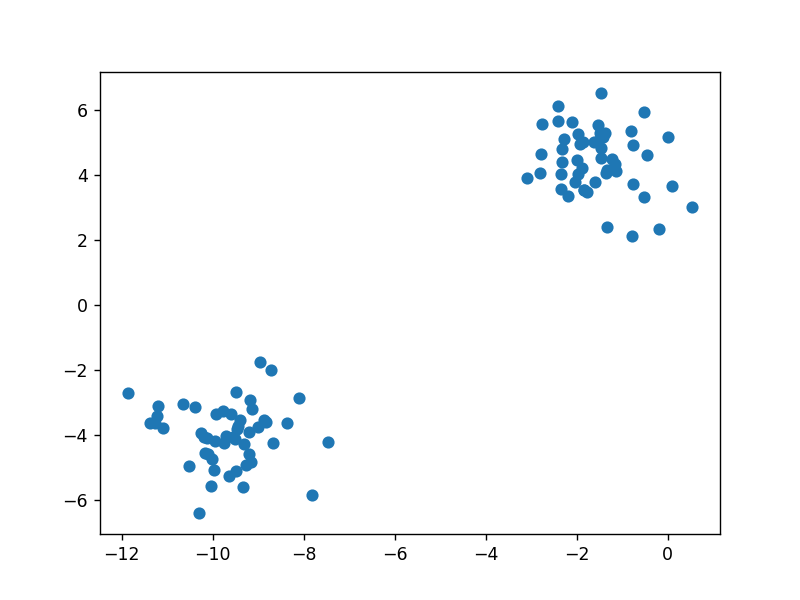

In [3]:
X, y = make_blobs(n_samples=100, centers=2, n_features=2, random_state=1, shuffle=True)

plt.figure()
plt.scatter(X.T[0], X.T[1])

In [4]:
kmeans_algorithm_test = kmeans(2)
kmeans_algorithm_test.fit(X, tols=1e-6)
kmeans_algorithm_test.centroids

Converged after 3 iterations


array([[-1.56328889,  4.42668036],
       [-9.6811771 , -3.97137943]])

<IPython.core.display.Javascript object>


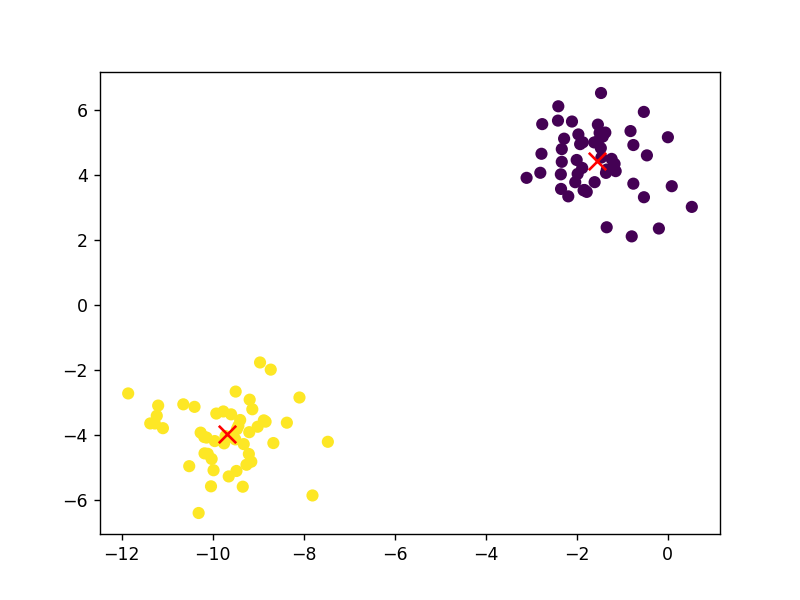

In [5]:
plt.figure()
plt.scatter(X.T[0], X.T[1], c=kmeans_algorithm_test.labels)
plt.scatter(kmeans_algorithm_test.centroids.T[0], kmeans_algorithm_test.centroids.T[1], c='red', marker='x', s=100)

### Make a prediction

In [6]:
test = np.array([[-7.28, -3.46], [-.66, 4.49]])
kmeans_algorithm_test.predict(test)

array([1., 0.])

# Scikit-learn implementation

In [7]:
from sklearn.cluster import KMeans

kmeans_sklearn = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans_sklearn.labels_

array([0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0])

In [8]:
kmeans_sklearn.cluster_centers_

array([[-1.56328889,  4.42668036],
       [-9.6811771 , -3.97137943]])

In [9]:
kmeans_sklearn.predict(test)

array([1, 0])

# 3 clusters

<IPython.core.display.Javascript object>


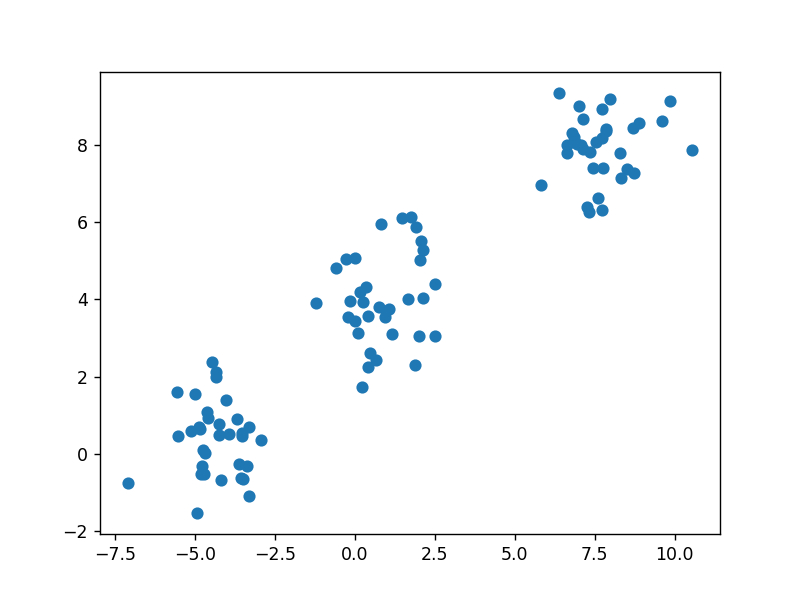

In [15]:
X, y = make_blobs(n_samples=100, centers=3, n_features=2, random_state=3, shuffle=True)

plt.figure()
plt.scatter(X.T[0], X.T[1])

### Apply our k-means algorithm

In [21]:
kmeans_algorithm_test = kmeans(3)
kmeans_algorithm_test.fit(X, tols=0.0001)
kmeans_algorithm_test.centroids

Converged after 3 iterations


array([[ 0.88587299,  4.01512953],
       [ 7.72441624,  7.92440438],
       [-4.3748783 ,  0.39784433]])

<IPython.core.display.Javascript object>


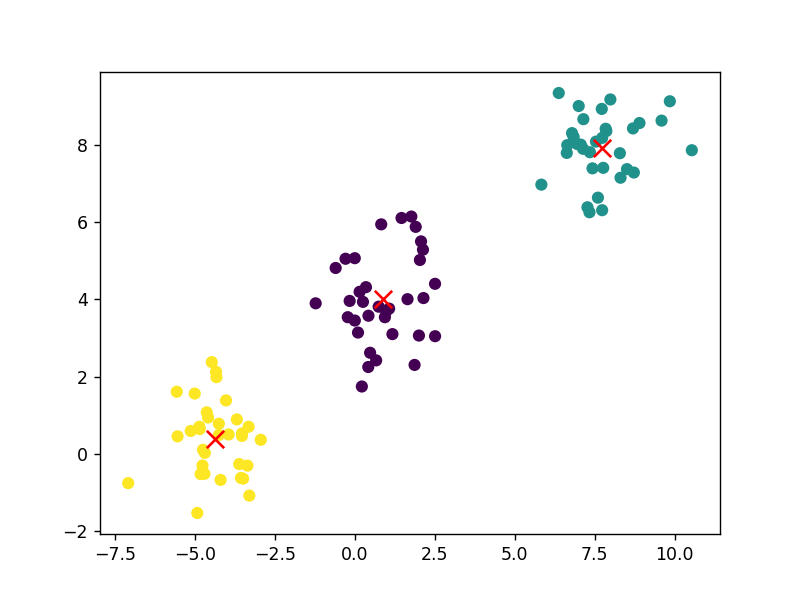

In [22]:
plt.figure()
plt.scatter(X.T[0], X.T[1], c=kmeans_algorithm_test.labels)
plt.scatter(kmeans_algorithm_test.centroids.T[0], kmeans_algorithm_test.centroids.T[1], c='red', marker='x', s=100)